In [279]:
# Random seed generator
import numpy as np

np.random.seed(59802020)
n = 50
m = 200
r = 10

# generate a random dataset
A = np.random.randn(n, r)
B = np.random.randn(r, m)
X = np.matmul(A, B) + 0.01*np.random.randn(n, m)

# zero centering
X -= np.mean(X, axis=-1).reshape(n, 1)
A[0,0]

-1.4417216631593655

In [280]:
# 3.a) Calculating best 10 basis for PCA projection

def PCAfac(X, dim):
    # Accepts centered data matrix and dimentionality to be reduced to
    
    # performing SVD of the data matrix
    eig_mat, Sigma, Vh = np.linalg.svd(X, full_matrices=True)
    return eig_mat[:,:dim]
    
#     # performing eigen value decomposition of covariance matrix of data
#     covariance_matrix = np.cov(X)
#     Sigma, U1 = np.linalg.eig(covariance_matrix)
    
#     # The columns of the U are the eigen vectors
#     # Order the eigen values and vectors 
#     ord_U, ord_Sigma = (list(i) for i in zip(*sorted(zip(U, abs(Sigma)), 
#                                                      key=lambda pair: pair[1],
#                                                      reverse=True)))
#     # Getting top 'dim' eigen vectors
#     proj_U = np.array(ord_U[:dim]).transpose()
    
#     return proj_U

A_1 = PCAfac(X, 10)
print (A_1.shape)

(50, 10)


Epoch: 1, Step-Size: 1.9476773662825538e-07, loss: 421849383.10112387, loss change: -421849383.10112387
Epoch: 2, Step-Size: 1.1050624477554588e-06, loss: 24103041.438238394, loss change: 397746341.6628855
Epoch: 3, Step-Size: 3.5378831989332355e-07, loss: 1290706.7615710185, loss change: 22812334.676667374
Epoch: 4, Step-Size: 1.007538540862914e-06, loss: 790373.9910678442, loss change: 500332.7705031743
Epoch: 5, Step-Size: 1.937990911043049e-06, loss: 329275.82738875883, loss change: 461098.1636790854
Epoch: 6, Step-Size: 1.186237117677168e-05, loss: 128632.08431156368, loss change: 200643.74307719513
Epoch: 7, Step-Size: 1.2048148366788645e-05, loss: 12940.621947460764, loss change: 115691.46236410292
Epoch: 8, Step-Size: 4.0616360404385595e-07, loss: 1470.660903467823, loss change: 11469.961043992942
Epoch: 9, Step-Size: 1.0245705735157337e-05, loss: 1430.6679019659894, loss change: 39.99300150183353
Epoch: 10, Step-Size: 6.114725378450414e-07, loss: 668.6204090370566, loss change

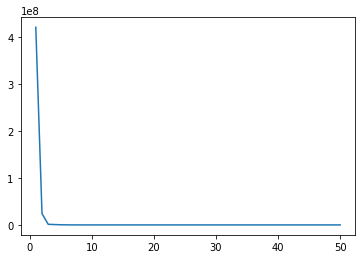

In [281]:
# 3.b) Backtracking line search gradient descent to get encoder matrix
import math
import copy
import random
import matplotlib.pyplot as plt

def get_gradient(A, X):
    # update and get gradient value as calculated in 3.b.i (-4(X - AA^TX)(X^TA))
    return -4*(X - A@(A.T)@X)@((X.T)@A)

def backtrack_line_search(A, X):
    # Uses function and some random values to get appropriate step size
    # f(X + t*DeltaX) - f(X) >= ct<grad_X, Delta_X>
    # c belongs to [0,1], rho belongs to [0,1]
    t = 1
    c = random.uniform(0, 1)
    rho = random.uniform(0, 1)
    grad_A = get_gradient(A, X)
    f_A = np.linalg.norm(X - A@(A.T)@X)**2
    while True:
        f_A_grad = np.linalg.norm(X - (A - t*grad_A)@((A - t*grad_A).T)@X)**2
        exp_1 = f_A_grad - f_A 
        exp_2 = -c*t*np.sum(grad_A*grad_A)
        if exp_1 >= exp_2:
            t *= rho
        else:
            break
        
    return t

def gradient_descent(A, X):
    # performs gradient descent using backtracking line search
    N = 50
    loss = 0
    loss_prev = 0
    epoch = 0
    loss_plot = [list(), list()]
    while epoch < N:
        # get new loss
        epoch += 1
        loss = np.linalg.norm(X - A@A.T@X)**2
        
        # get_direction
        grad_A = get_gradient(A, X)
        
        # get size
        t = backtrack_line_search(A, X)
        
        # update step
        A -= t*grad_A
        
        # logs
        print ('Epoch: {0}, Step-Size: {1}, loss: {2}, loss change: {3}'.format(epoch, t, loss, loss_prev-loss))
        loss_prev = loss
        
        # for plotting a graph
        loss_plot[0].append(epoch)
        loss_plot[1].append(loss)
       
    plt.plot(loss_plot[0], loss_plot[1])
    plt.show()
    return A
  
A_copy = copy.deepcopy(A)
A_2 = gradient_descent(A_copy, X)

In [282]:
# 3.c) Comparing two matrices
def matrix_comp(A_1, A_2):
    # comapres two matrices via subspace projectors
    return np.linalg.norm(A_1@A_1.T - A_2@np.linalg.pinv(A_2))

print ('Difference between A1 and A2: ',matrix_comp(A_1, A_2))

Difference between A1 and A2:  1.1894858011840334e-08


Epoch: 1, Step-A: 5.4e-05, Step-Z: 0.001419, loss: 5038406.436923583, loss_change:-5038406.436923583
Epoch: 2, Step-A: 4e-06, Step-Z: 0.000671, loss: 1503986.0413449497, loss_change:3534420.395578633
Epoch: 3, Step-A: 3.1e-05, Step-Z: 0.003637, loss: 1058930.744036602, loss_change:445055.29730834765
Epoch: 4, Step-A: 3.5e-05, Step-Z: 0.078723, loss: 106224.73763898108, loss_change:952706.006397621
Epoch: 5, Step-A: 5.6e-05, Step-Z: 0.003299, loss: 31763.6340602806, loss_change:74461.10357870048
Epoch: 6, Step-A: 3.7e-05, Step-Z: 0.036979, loss: 21569.519932967047, loss_change:10194.114127313554
Epoch: 7, Step-A: 1.4e-05, Step-Z: 0.1208, loss: 11906.938985235676, loss_change:9662.58094773137
Epoch: 8, Step-A: 0.000137, Step-Z: 0.060002, loss: 9851.482222989209, loss_change:2055.4567622464674
Epoch: 9, Step-A: 6.8e-05, Step-Z: 0.08047, loss: 7745.422580687753, loss_change:2106.059642301456
Epoch: 10, Step-A: 3.4e-05, Step-Z: 0.003578, loss: 6783.536776160264, loss_change:961.885804527489

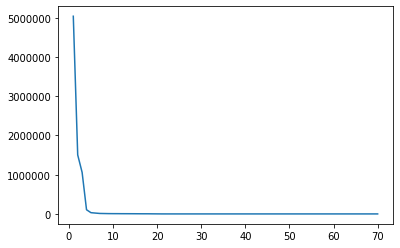

In [283]:
# 4.b) Backtracking line search subgradient descent for two parameters

def get_gradient_A(A, Z, X):
    # update and get gradient value as calculated in 3.b.i (-2(X - AZ)(Z^T))
    return -2*(X - A@Z)@(Z.T)

def get_gradient_Z(A, Z, X):
    # update and get gradient value as calculated in 3.b.i (-2(A^T)(X - AZ))
    return -2*(A.T)@(X - A@Z)

def backtrack_line_search(A, Z, X, var):
    # Uses function and some random values to get appropriate step size
    # f(X + t*DeltaX) - f(X) >= ct<grad_X, Delta_X>
    # c belongs to [0,1], rho belongs to [0,1]
    t = 1
    c = random.uniform(0, 1)
    rho = random.uniform(0, 1)
    gradient = get_gradient_Z(A, Z, X)
    if var == 'A':
        gradient = get_gradient_A(A, Z, X)
    f_A_Z = np.linalg.norm(X - A@Z)**2
    while True:
        f_A_Z_del = 0
        if var == 'A':    
            f_A_Z_del = np.linalg.norm(X - (A - t*gradient)@Z)**2
        else:
            f_A_Z_del = np.linalg.norm(X - A@(Z - t*gradient))**2
            
        exp_1 = f_A_Z_del - f_A_Z 
        exp_2 = -c*t*np.sum(gradient*gradient)
        if exp_1 >= exp_2:
            t *= rho
        else:
            break
        
    return t

def sub_gradient_descent(A, Z, X):
    # performs sub gradient descent of two variables using backtracking line search
    N = 70
    loss = 0
    loss_prev = 0
    epoch = 0
    loss_plot = [list(), list()]
    # Can even give condit
    while epoch < N:
        # get new loss
        epoch += 1
        loss = np.linalg.norm(X - A@Z)**2
        
        # get_direction_A
        grad_A = get_gradient_A(A, Z, X)
        
        # get_direction_Z
        grad_Z = get_gradient_Z(A, Z, X)
        
        # get size A
        t_A = backtrack_line_search(A, Z, X, 'A')
        
        # get size Z
        t_Z = backtrack_line_search(A, Z, X, 'Z')
        
        # update step A
        A -= t_A*grad_A
        
        # update step Z
        Z -= t_Z*grad_Z
        
        # logs
        print ('Epoch: {0}, Step-A: {1}, Step-Z: {2}, loss: {3}, loss_change:{4}'.format(epoch, round(t_A,6), round(t_Z,6), loss, (loss_prev - loss)))
        loss_prev = loss
        
        # for plotting a graph
        loss_plot[0].append(epoch)
        loss_plot[1].append(loss)
       
    plt.plot(loss_plot[0], loss_plot[1])
    plt.show()
    return A
  
A_copy = copy.deepcopy(A)
Z = A_1.T@X
A_3 = sub_gradient_descent(A_copy, Z, X)

In [284]:
# 4.c) Comparing two matrices
def matrix_comp(A_1, A_2):
    # comapres two matrices via subspace projectors
    return np.linalg.norm(A_1@A_1.T - A_2@np.linalg.pinv(A_2))

print ('Difference between A1 and A3: ',matrix_comp(A_1, A_3))
print ('Difference between A2 and A3: ',matrix_comp(A_2, A_3))

Difference between A1 and A3:  3.479398829231894e-08
Difference between A2 and A3:  4.132234436413547e-08
